In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from glob import glob


Bad key "text.kerning_factor" on line 4 in
/Users/sarasharick/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
cumulative_cases = []
date = []

In [3]:
#No New York cases from Jan22 to MAR01

filenames = sorted(glob('*2020a.txt'))
dataframes = [pd.read_csv(f) for f in filenames]

for dataframe in dataframes:
    d1 = dataframe.loc[dataframe['Country/Region'] == 'US']
    d1 = d1.drop(d1[d1['Province/State'].str.contains('Princess')].index)
    cumulative_cases.append(d1['Confirmed'].sum())
    
for filename in filenames:
    date.append(filename[0:5])

In [4]:
#MAR02-MAR09

filenames2 = sorted(glob('*2020b.txt'))
dataframes2 = [pd.read_csv(f) for f in filenames2]

for dataframe in dataframes2:
    d2 = dataframe.loc[dataframe['Country/Region'] == 'US']
    d2 = d2.drop(d2[d2['Province/State'].str.contains('NY')].index)
    d2 = d2.drop(d2[d2['Province/State'].str.contains('Princess')].index)
    cumulative_cases.append(d2['Confirmed'].sum())
    
for filename in filenames2:
    date.append(filename[0:5])

In [5]:
#Johns Hopkins change in New York notation MAR10-MAR21

filenames3 = sorted(glob('*2020c.txt'))
dataframes3 = [pd.read_csv(f) for f in filenames3]

for dataframe in dataframes3:
    d3 = dataframe.loc[dataframe['Country/Region'] == 'US']
    d3 = d3.drop(d3[d3['Province/State'].str.contains('New York')].index)
    d3 = d3.drop(d3[d3['Province/State'].str.contains('Princess')].index)
    cumulative_cases.append(d3['Confirmed'].sum())
    
for filename in filenames3:
    date.append(filename[0:5])

In [6]:
#Johns Hopkins change in column notation MAR22-Present

filenames4 = sorted(glob('*2020d.txt'))
dataframes4 = [pd.read_csv(f) for f in filenames4]

for dataframe in dataframes4:
    d4 = dataframe.loc[dataframe['Country_Region'] == 'US']
    d4 = d4.drop(d4[d4['Province_State'].str.contains('New York')].index)
    d4 = d4.drop(d4[d4['Province_State'].str.contains('Princess')].index)
    d4 = d4.drop(d4[d4['Province_State'].str.contains('Military')].index)
    cumulative_cases.append(d4['Confirmed'].sum())
    
for filename in filenames4:
    date.append(filename[0:5])

In [7]:
print(len(cumulative_cases))
print(len(date))

142
142


In [8]:
US_cases_minus_NY = pd.DataFrame(list(zip(date, cumulative_cases)))
US_cases_minus_NY.columns = ['date', 'cumulative_cases']
US_cases_minus_NY['daily_new_cases'] = US_cases_minus_NY['cumulative_cases'].diff(1)
US_cases_minus_NY['new_reports_rolling_7'] = US_cases_minus_NY['daily_new_cases'].rolling(window=7).mean()

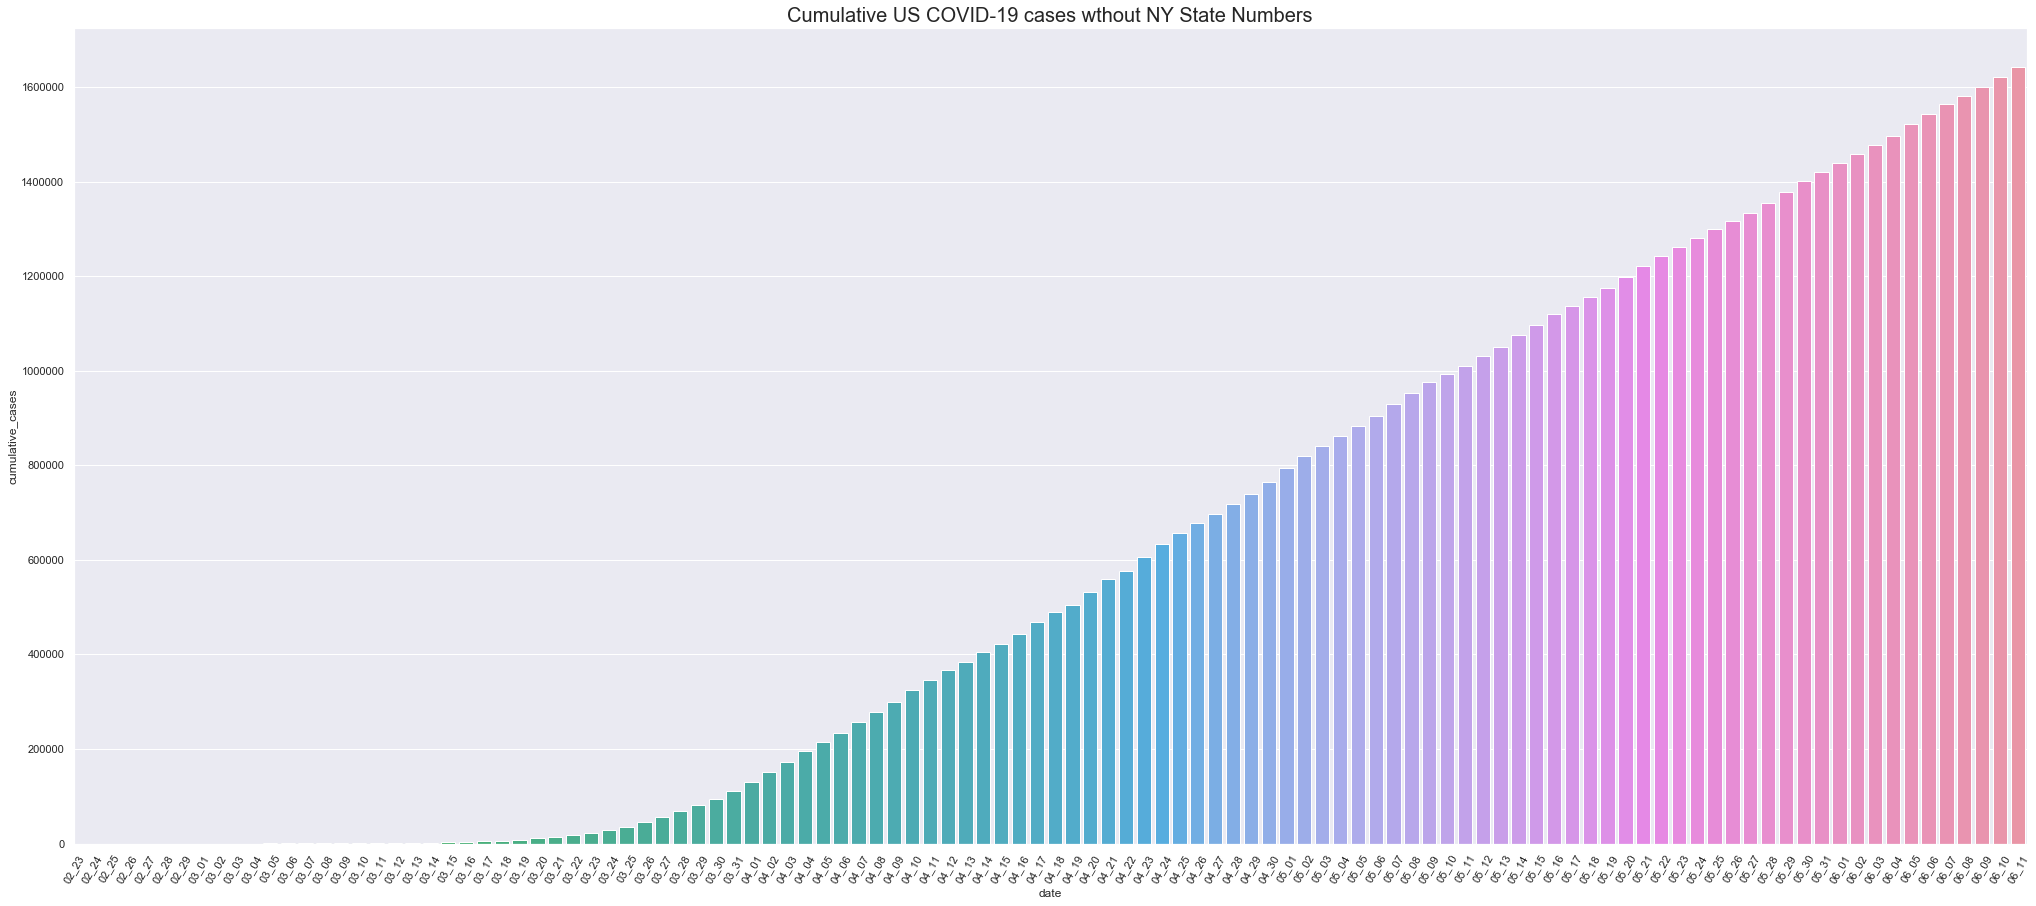

In [9]:
plt.figure(figsize=(35, 15))
#sns.palplot(sns.light_palette("gray"))
US_cumulative_plot_no_NY = sns.barplot(x='date', y='cumulative_cases', data=US_cases_minus_NY)
plt.xticks(rotation=60)
plt.xlim(32)
plt.title('Cumulative US COVID-19 cases wthout NY State Numbers', size=20)
plt.savefig('Cumulative US COVID-19 cases wthout NY State Numbers')
plt.show()

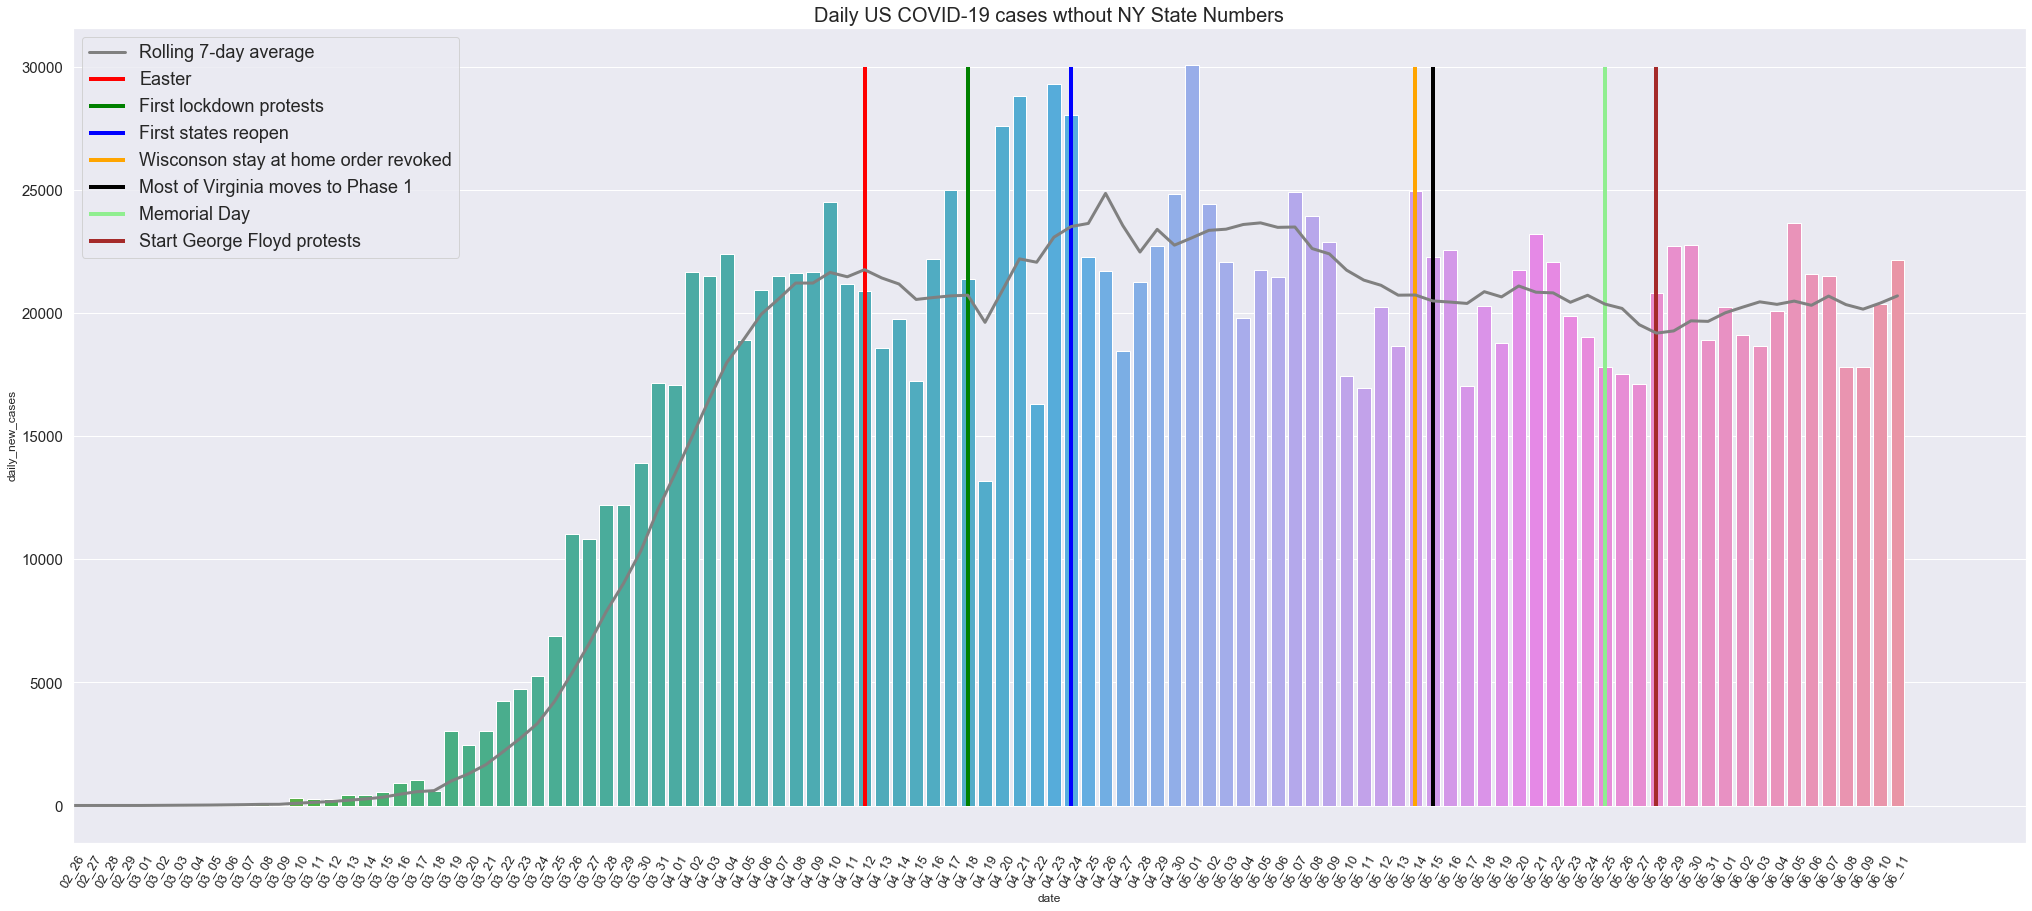

In [10]:
plt.figure(figsize=(35, 15))
US_daily_plot_no_NY = sns.barplot(x='date', y='daily_new_cases', data=US_cases_minus_NY)
plt.xticks(rotation=60, size=13)
plt.yticks(size=15)
plt.title('Daily US COVID-19 cases wthout NY State Numbers', size=20)
plt.vlines(x=81, ymin=0, ymax=30000, color='red', linewidths=4, label='Easter')
plt.vlines(x=87, ymin=0, ymax=30000, color='green', linewidths=4, label='First lockdown protests')
plt.vlines(x=93, ymin=0, ymax=30000, color='blue', linewidths=4, label='First states reopen')
plt.vlines(x=113, ymin=0, ymax=30000, color='orange', linewidths=4, label='Wisconson stay at home order revoked')
plt.vlines(x=114, ymin=0, ymax=30000, color='black', linewidths=4, label='Most of Virginia moves to Phase 1')
plt.vlines(x=124, ymin=0, ymax=30000, color='lightgreen', linewidths=4, label='Memorial Day')
plt.vlines(x=127, ymin=0, ymax=30000, color='brown', linewidths=4, label='Start George Floyd protests')
plt.plot(US_cases_minus_NY['new_reports_rolling_7'], color='gray', label='Rolling 7-day average', linewidth=3)
plt.xlim(35)
plt.legend(loc='upper left', fontsize=18)
plt.savefig('Daily US COVID-19 cases wthout NY State Numbers')
plt.show()

In [11]:
US_cases_minus_NY.daily_new_cases[73:80].mean() # April 4 to April 10, NY State peak

21655.428571428572

In [12]:
US_cases_minus_NY.daily_new_cases[-7:].mean() #Most recent 7 days

20704.0

In [13]:
print(US_cases_minus_NY.daily_new_cases[-1:])

141    22147.0
Name: daily_new_cases, dtype: float64


Without NY and NJ

In [14]:
cumulative_cases1 = []
date1 = []

filenames5 = sorted(glob('*2020a.txt'))
dataframes5 = [pd.read_csv(f) for f in filenames5]

for dataframe in dataframes5:
    d5 = dataframe.loc[dataframe['Country/Region'] == 'US']
    d5 = d5.drop(d5[d5['Province/State'].str.contains('Princess')].index)
    cumulative_cases1.append(d5['Confirmed'].sum())
    
for filename in filenames5:
    date1.append(filename[0:5])
    
#MAR02-MAR09

filenames6 = sorted(glob('*2020b.txt'))
dataframes6 = [pd.read_csv(f) for f in filenames6]

for dataframe in dataframes6:
    d6 = dataframe.loc[dataframe['Country/Region'] == 'US']
    d6 = d6.drop(d6[d6['Province/State'].str.contains('NY')].index)
    d6 = d6.drop(d6[d6['Province/State'].str.contains('NJ')].index)
    d6 = d6.drop(d6[d6['Province/State'].str.contains('Princess')].index)
    cumulative_cases1.append(d6['Confirmed'].sum())
    
for filename in filenames6:
    date1.append(filename[0:5])
    
#Johns Hopkins change in state notation MAR10-MAR21

filenames7 = sorted(glob('*2020c.txt'))
dataframes7 = [pd.read_csv(f) for f in filenames7]

for dataframe in dataframes7:
    d7 = dataframe.loc[dataframe['Country/Region'] == 'US']
    d7 = d7.drop(d7[d7['Province/State'].str.contains('New York')].index)
    d7 = d7.drop(d7[d7['Province/State'].str.contains('New Jersey')].index)
    d7 = d7.drop(d7[d7['Province/State'].str.contains('Princess')].index)
    cumulative_cases1.append(d7['Confirmed'].sum())
    
for filename in filenames7:
    date1.append(filename[0:5])
    
#Johns Hopkins change in column notation MAR22-Present

filenames8 = sorted(glob('*2020d.txt'))
dataframes8 = [pd.read_csv(f) for f in filenames8]

for dataframe in dataframes8:
    d8 = dataframe.loc[dataframe['Country_Region'] == 'US']
    d8 = d8.drop(d8[d8['Province_State'].str.contains('New York')].index)
    d8 = d8.drop(d8[d8['Province_State'].str.contains('New Jersey')].index)
    d8 = d8.drop(d8[d8['Province_State'].str.contains('Princess')].index)
    d8 = d8.drop(d8[d8['Province_State'].str.contains('Military')].index)
    cumulative_cases1.append(d8['Confirmed'].sum())
    
for filename in filenames8:
    date1.append(filename[0:5])

In [15]:
print(len(cumulative_cases1))
print(len(date1))

142
142


In [16]:
US_cases_minus_NY_NJ = pd.DataFrame(list(zip(date1, cumulative_cases1)))
US_cases_minus_NY_NJ.columns = ['date', 'cumulative_cases']
US_cases_minus_NY_NJ['daily_new_cases'] = US_cases_minus_NY_NJ['cumulative_cases'].diff(1)
US_cases_minus_NY_NJ['new_reports_rolling_7'] = US_cases_minus_NY_NJ['daily_new_cases'].rolling(window=7).mean()

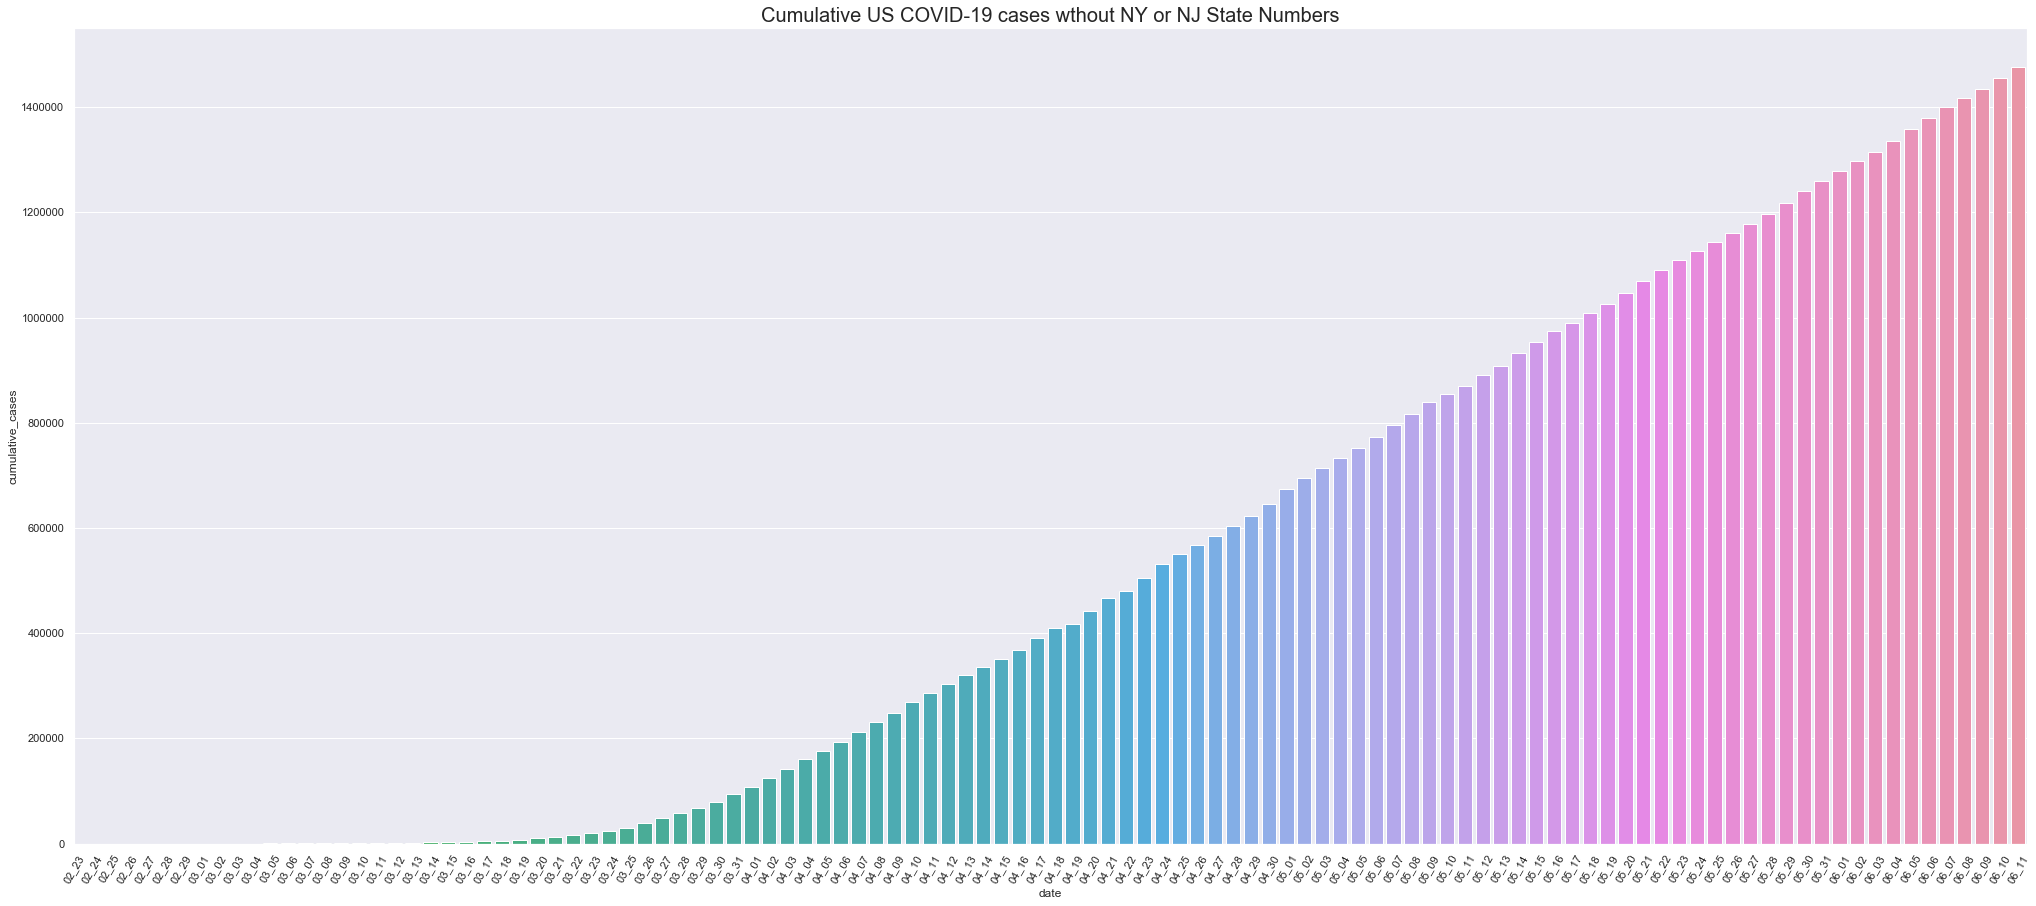

In [17]:
plt.figure(figsize=(35, 15))
US_cumulative_plot_no_NY_NJ = sns.barplot(x='date', y='cumulative_cases', data=US_cases_minus_NY_NJ)
plt.xticks(rotation=60)
plt.xlim(32)
plt.title('Cumulative US COVID-19 cases wthout NY or NJ State Numbers', size=20)
#plt.savefig('Cumulative US COVID-19 cases wthout NY or NJState Numbers')
plt.show()

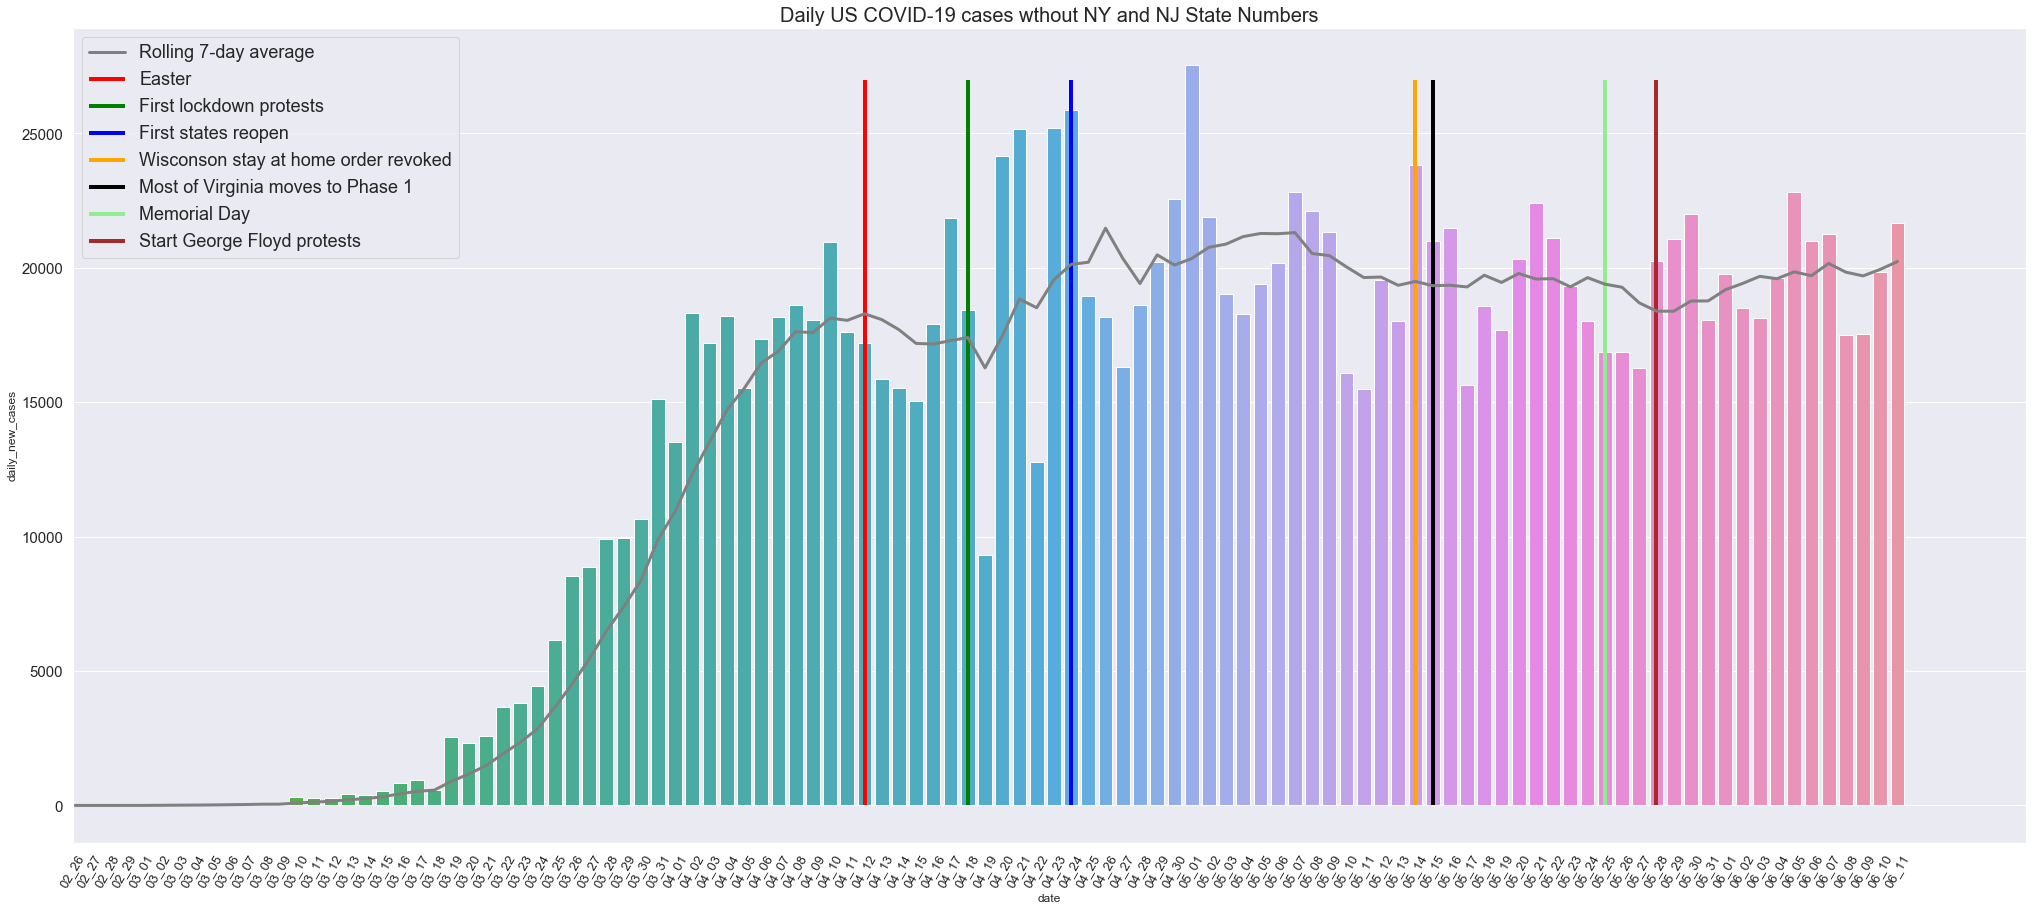

In [18]:
plt.figure(figsize=(35, 15))
US_daily_plot_no_NY_NJ = sns.barplot(x='date', y='daily_new_cases', data=US_cases_minus_NY_NJ)
plt.xticks(rotation=60, size=13)
plt.yticks(size=15)
plt.title('Daily US COVID-19 cases wthout NY and NJ State Numbers', size=20)
plt.vlines(x=81, ymin=0, ymax=27000, color='red', linewidths=4, label='Easter')
plt.vlines(x=87, ymin=0, ymax=27000, color='green', linewidths=4, label='First lockdown protests')
plt.vlines(x=93, ymin=0, ymax=27000, color='blue', linewidths=4, label='First states reopen')
plt.vlines(x=113, ymin=0, ymax=27000, color='orange', linewidths=4, label='Wisconson stay at home order revoked')
plt.vlines(x=114, ymin=0, ymax=27000, color='black', linewidths=4, label='Most of Virginia moves to Phase 1')
plt.vlines(x=124, ymin=0, ymax=27000, color='lightgreen', linewidths=4, label='Memorial Day')
plt.vlines(x=127, ymin=0, ymax=27000, color='brown', linewidths=4, label='Start George Floyd protests')
plt.plot(US_cases_minus_NY_NJ['new_reports_rolling_7'], color='gray', label='Rolling 7-day average', linewidth=3)
plt.xlim(35)
plt.legend(loc='best', fontsize=18)
#plt.savefig('Daily US COVID-19 cases wthout NY and NJ State Numbers')
plt.show()

In [19]:
US_cases_minus_NY_NJ.daily_new_cases[73:80].mean() # April 4 to April 10, NY State peak

18127.85714285714

In [20]:
US_cases_minus_NY_NJ.daily_new_cases[-7:].mean() #Most recent 7 days

20234.571428571428

In [21]:
print(US_cases_minus_NY_NJ.daily_new_cases[-1:])

141    21677.0
Name: daily_new_cases, dtype: float64


In [22]:
cumulative_cases2 = []
date2 = []

filenames9 = sorted(glob('*2020a.txt'))
dataframes9 = [pd.read_csv(f) for f in filenames9]

for dataframe in dataframes9:
    d9 = dataframe.loc[dataframe['Country/Region'] == 'US']
    d9 = d9.drop(d9[d9['Province/State'].str.contains('Princess')].index)
    cumulative_cases2.append(d9['Confirmed'].sum())
    
for filename in filenames9:
    date2.append(filename[0:5])
    
#MAR02-MAR09

filenames10 = sorted(glob('*2020b.txt'))
dataframes10 = [pd.read_csv(f) for f in filenames10]

for dataframe in dataframes10:
    d10 = dataframe.loc[dataframe['Country/Region'] == 'US']
    d10 = d10.drop(d10[d10['Province/State'].str.contains('NY')].index)
    d10 = d10.drop(d10[d10['Province/State'].str.contains('NJ')].index)
    d10 = d10.drop(d10[d10['Province/State'].str.contains('MA')].index)
    d10 = d10.drop(d10[d10['Province/State'].str.contains('Princess')].index)
    cumulative_cases2.append(d10['Confirmed'].sum())
    
for filename in filenames10:
    date2.append(filename[0:5])
    
#Johns Hopkins change in state notation MAR10-MAR21

filenames11 = sorted(glob('*2020c.txt'))
dataframes11 = [pd.read_csv(f) for f in filenames11]

for dataframe in dataframes11:
    d11 = dataframe.loc[dataframe['Country/Region'] == 'US']
    d11 = d11.drop(d11[d11['Province/State'].str.contains('New York')].index)
    d11 = d11.drop(d11[d11['Province/State'].str.contains('New Jersey')].index)
    d11 = d11.drop(d11[d11['Province/State'].str.contains('Massachusetts')].index)
    d11 = d11.drop(d11[d11['Province/State'].str.contains('Princess')].index)
    cumulative_cases2.append(d11['Confirmed'].sum())
    
for filename in filenames11:
    date2.append(filename[0:5])
    
#Johns Hopkins change in column notation MAR22-Present

filenames12 = sorted(glob('*2020d.txt'))
dataframes12 = [pd.read_csv(f) for f in filenames12]

for dataframe in dataframes12:
    d12 = dataframe.loc[dataframe['Country_Region'] == 'US']
    d12 = d12.drop(d12[d12['Province_State'].str.contains('New York')].index)
    d12 = d12.drop(d12[d12['Province_State'].str.contains('New Jersey')].index)
    d12 = d12.drop(d12[d12['Province_State'].str.contains('Massachusetts')].index)
    d12 = d12.drop(d12[d12['Province_State'].str.contains('Princess')].index)
    d12 = d12.drop(d12[d12['Province_State'].str.contains('Military')].index)
    cumulative_cases2.append(d12['Confirmed'].sum())
    
for filename in filenames12:
    date2.append(filename[0:5])

In [23]:
print(len(cumulative_cases2))
print(len(date2))

142
142


In [24]:
US_cases_minus_NY_NJ_MA = pd.DataFrame(list(zip(date2, cumulative_cases2)))
US_cases_minus_NY_NJ_MA.columns = ['date', 'cumulative_cases']
US_cases_minus_NY_NJ_MA['daily_new_cases'] = US_cases_minus_NY_NJ_MA['cumulative_cases'].diff(1)
US_cases_minus_NY_NJ_MA['new_reports_rolling_7'] = US_cases_minus_NY_NJ_MA['daily_new_cases'].rolling(window=7).mean()

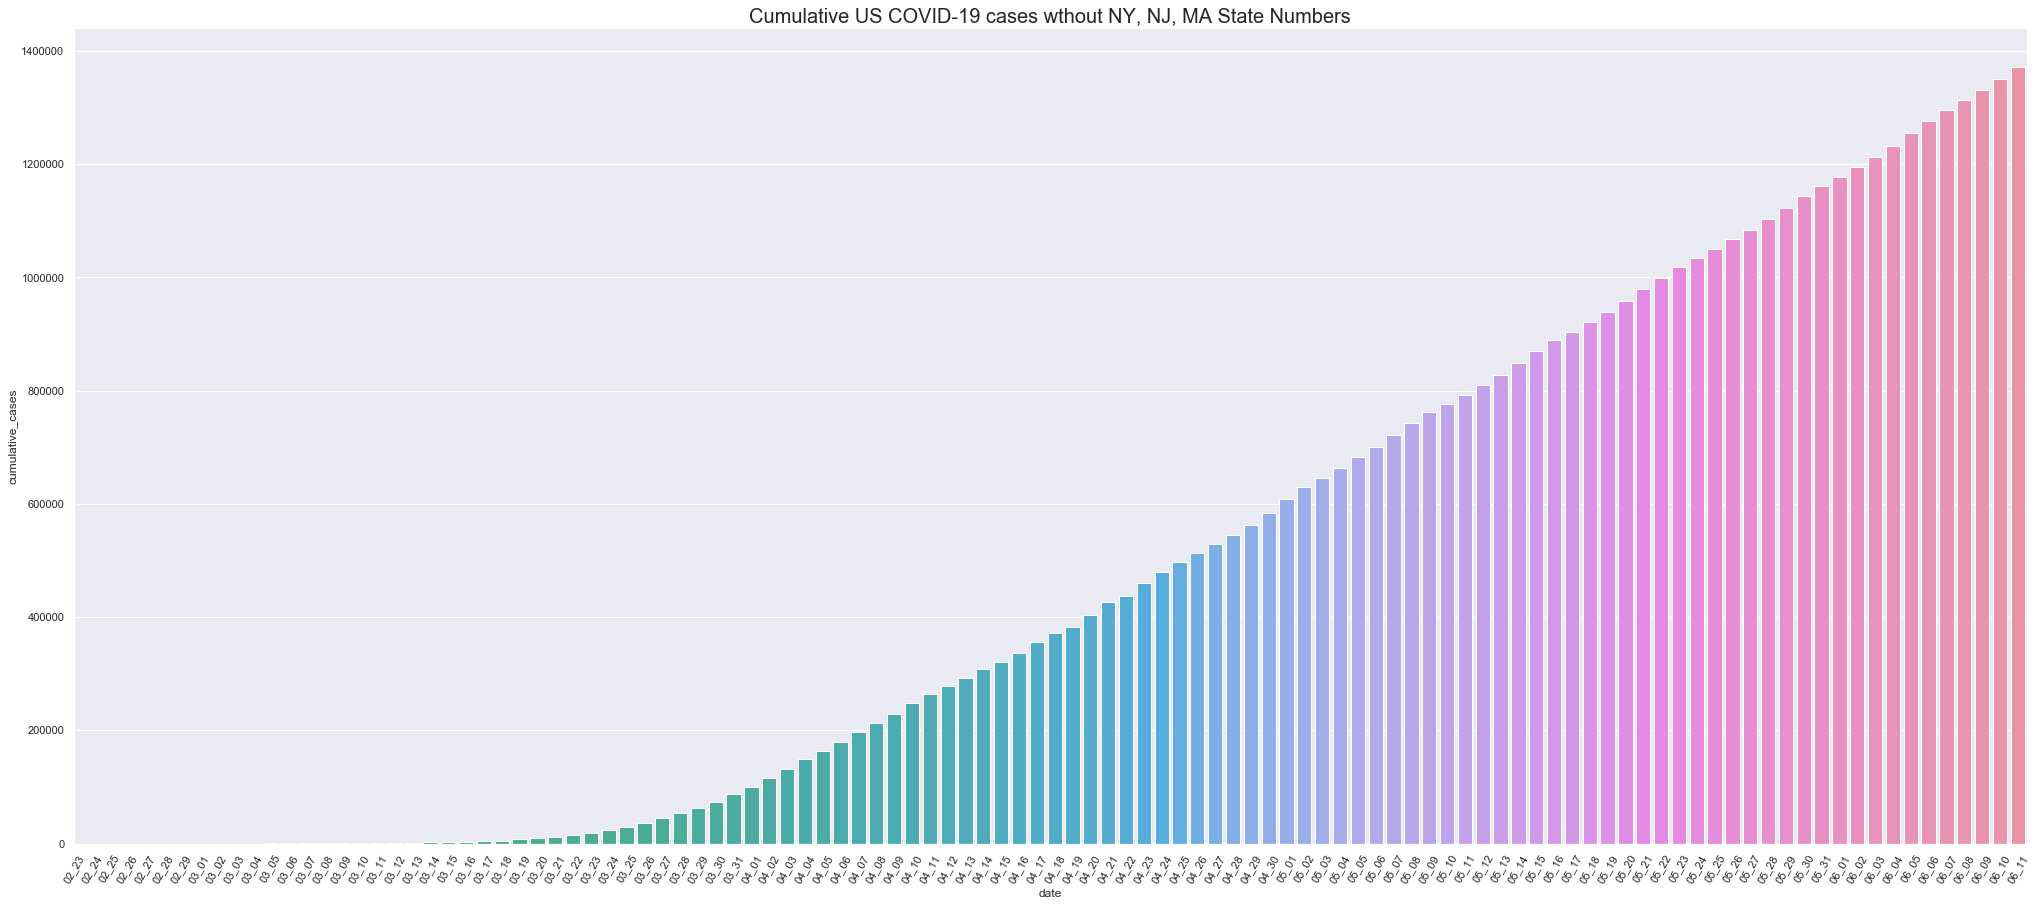

In [25]:
plt.figure(figsize=(35, 15))
US_cumulative_plot_no_NY_NJ_MA = sns.barplot(x='date', y='cumulative_cases', data=US_cases_minus_NY_NJ_MA)
plt.xticks(rotation=60)
plt.xlim(32)
plt.title('Cumulative US COVID-19 cases wthout NY, NJ, MA State Numbers', size=20)
#plt.savefig('Cumulative US COVID-19 cases wthout NY or NJState Numbers')
plt.show()

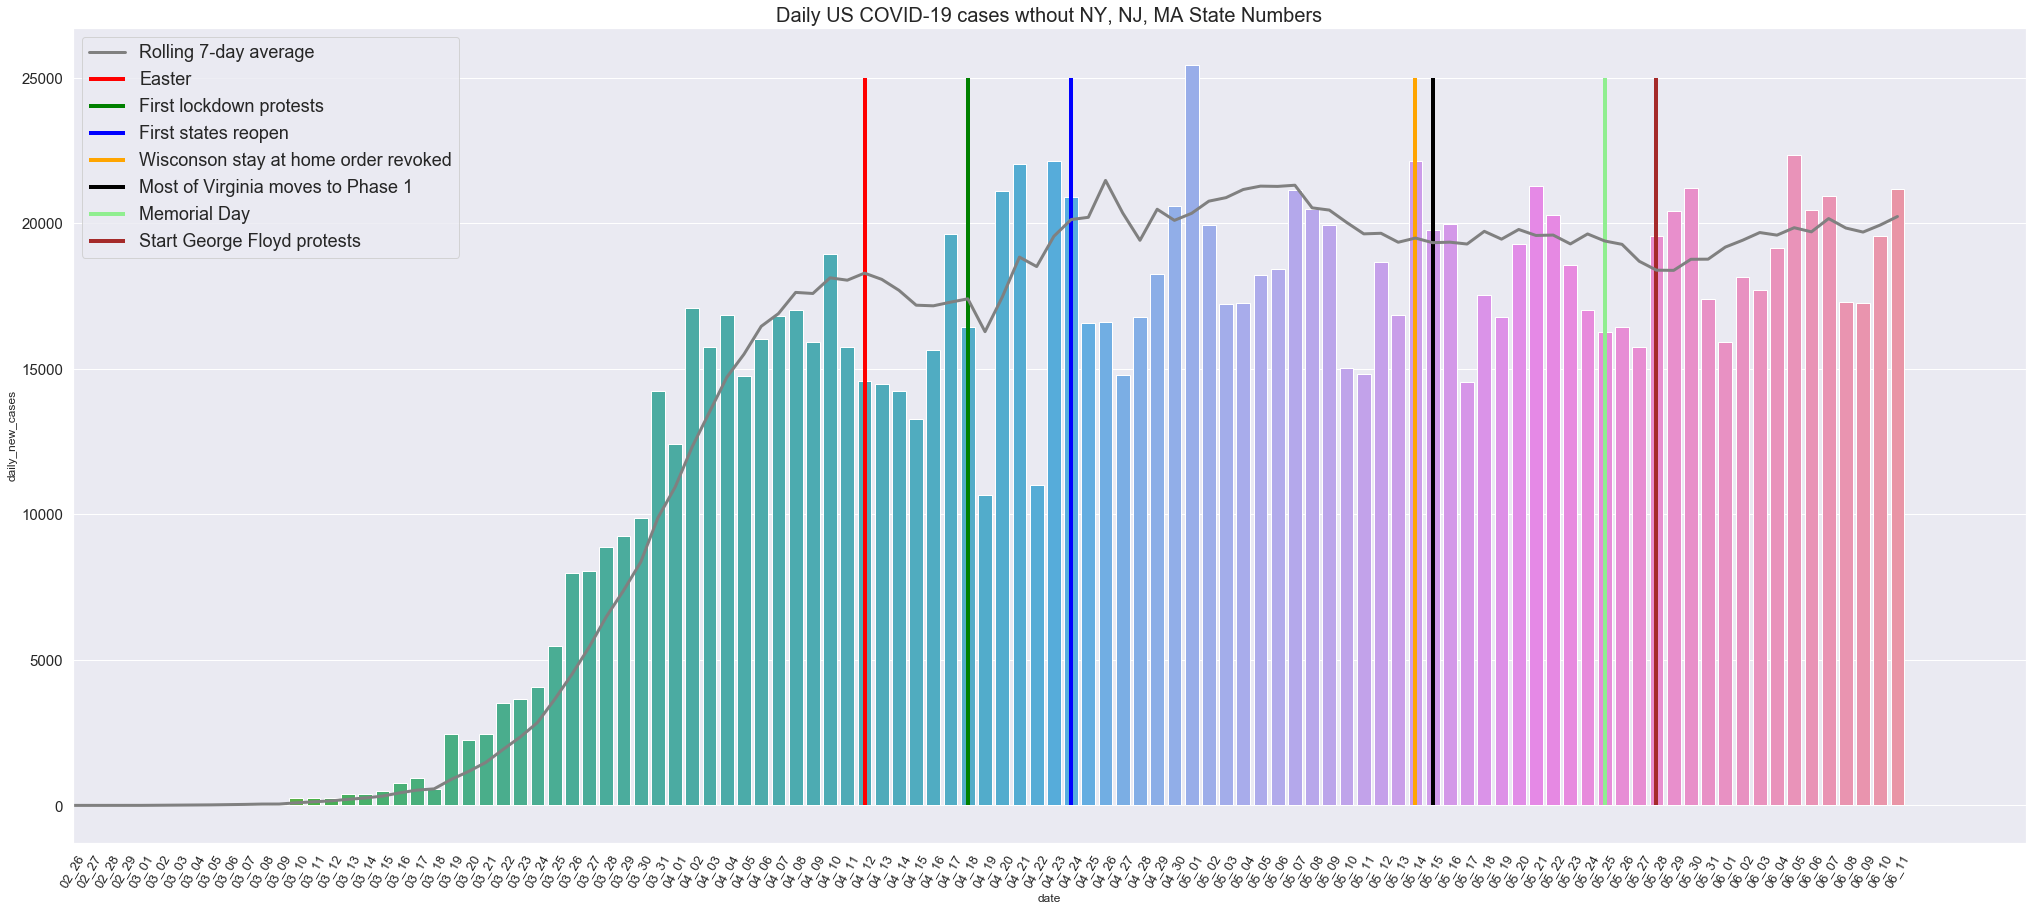

In [26]:
plt.figure(figsize=(35, 15))
US_daily_plot_no_NY_NJ_MA = sns.barplot(x='date', y='daily_new_cases', data=US_cases_minus_NY_NJ_MA)
plt.xticks(rotation=60, size=13)
plt.yticks(size=15)
plt.title('Daily US COVID-19 cases wthout NY, NJ, MA State Numbers', size=20)
plt.vlines(x=81, ymin=0, ymax=25000, color='red', linewidths=4, label='Easter')
plt.vlines(x=87, ymin=0, ymax=25000, color='green', linewidths=4, label='First lockdown protests')
plt.vlines(x=93, ymin=0, ymax=25000, color='blue', linewidths=4, label='First states reopen')
plt.vlines(x=113, ymin=0, ymax=25000, color='orange', linewidths=4, label='Wisconson stay at home order revoked')
plt.vlines(x=114, ymin=0, ymax=25000, color='black', linewidths=4, label='Most of Virginia moves to Phase 1')
plt.vlines(x=124, ymin=0, ymax=25000, color='lightgreen', linewidths=4, label='Memorial Day')
plt.vlines(x=127, ymin=0, ymax=25000, color='brown', linewidths=4, label='Start George Floyd protests')
plt.plot(US_cases_minus_NY_NJ['new_reports_rolling_7'], color='gray', label='Rolling 7-day average', linewidth=3)
plt.title('Daily US COVID-19 cases wthout NY, NJ, MA State Numbers', size=20)
plt.xlim(35)
plt.legend(loc='best', fontsize=18)
#plt.savefig('Daily US COVID-19 cases wthout NY and NJ State Numbers')
plt.show()

In [27]:
US_cases_minus_NY_NJ_MA.daily_new_cases[73:80].mean() # April 4 to April 10, NY State peak

16617.571428571428

In [28]:
US_cases_minus_NY_NJ_MA.daily_new_cases[-7:].mean() #Most recent 7 days

19862.571428571428

In [29]:
print(US_cases_minus_NY_NJ_MA.daily_new_cases[-1:])

141    21166.0
Name: daily_new_cases, dtype: float64
